In [1]:
import pickle

with open('ratios.pkl', 'rb') as f:
    ratios = pickle.load(f)

with open('ppls.pkl', 'rb') as f:
    ppls = pickle.load(f)

In [2]:
import matplotlib.pyplot as plt

from matplotlib.cm import ScalarMappable, viridis_r
from matplotlib.colors import LogNorm
from matplotlib.ticker import *

from scipy.optimize import curve_fit

In [3]:
import numpy as np

steps = np.arange(10000, 200001, 10000)

def func(r, B, b):
    return B / r**b

def plot(domain):
    names = ratios.keys()
    rd = np.asarray([ratios[name][domain] for name in names])
    order = np.argsort(rd)

    norm = LogNorm(vmin=min(steps), vmax=max(steps))
    mappable = ScalarMappable(norm=norm, cmap=viridis_r)

    fig, ax = plt.subplots()
    for idx, step in enumerate(steps):
        x = rd[order]
        y = np.asarray([ppls[name][domain].iloc[idx] for name in names])
        y = y[order]
        dot, = ax.plot(x, y, 'o', color=mappable.to_rgba(step), label=step)
        
        popt, pcov = curve_fit(func, xdata=x, ydata=y)
        fitted_y = func(x, *popt)
        ax.plot(x, fitted_y, ':', color=dot.get_color())

    cbar = fig.colorbar(mappable, ax=ax)
    cbar.set_label('Training Steps')

    ax.set_yscale('log')
    ax.set_xscale('log')

    ax.set_xlabel('Domain Proportion')
    ax.set_ylabel('Validation Loss')
    ax.set_title(domain)

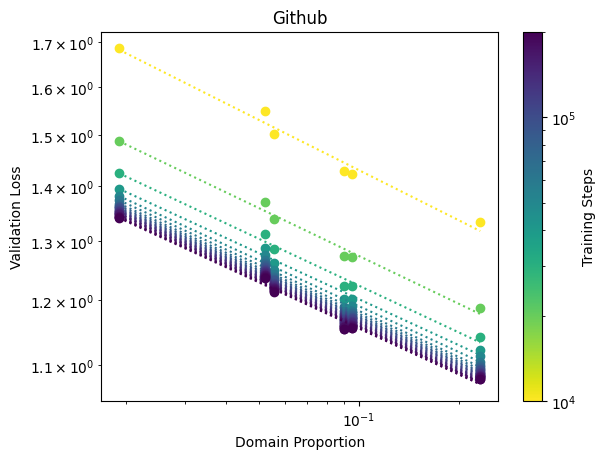

In [4]:
plot('Github')